In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(123)

import datetime
import numpy as np
import pandas_datareader.data as web
import pandas as pd
from scipy.stats import norm

# Mean-Variance Optimization

### What is the Best Way to Invest Limited Resources?
We are often faced with the question of how we should allocate a limited resource (often time or money) to different potential investments. Usually, we are trying to maximize some benefit or return on investment.

Mean-Variance Optimization provides a solution to the question of how should one allocate a limited resource (often time or money) across different potential investments in order to maximize returns of a portfolio. This optimization is a way to determine a set of 'best' allocations based on expected risk and return.

### Let's look at a concrete example using money as our limited resource and stocks as our potential investments
In the code below we pull the closing price data for four technology stocks.

In [4]:
#stocks in our portfolio
stocks = ['AAPL','MSFT','AMZN','YHOO']

#pull the price data for each stock
data = web.DataReader(stocks, data_source = 'google', start = '01/01/2010')['Close']

Let's look at the data in tabular format:

In [6]:
data.head()

,AAPL,AMZN,MSFT,YHOO
Date,,,,
2010-01-04,30.57,133.90,30.95,17.10
2010-01-05,30.63,134.69,30.96,17.23
2010-01-06,30.14,132.25,30.77,17.17
2010-01-07,30.08,130.00,30.45,16.70
2010-01-08,30.28,133.52,30.66,16.70


For our analysis we care about the relative returns of stocks in our portfolio.

In [ ]:
#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

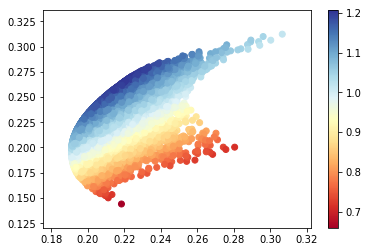

In [78]:
#Number of random portfolio weights to test
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))

for i in xrange(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #Store Sharpe Ratio (return / vol) 
    #risk free rate component excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
#convert results array to a Pandas Dataframe
results_frame = pd.DataFrame(results.T, columns = ['ret','stdev','sharpe'])

#create a scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()